# Dataset objects in rsatoolbox

These exercises show how to load and structure a dataset object.

In this demo, we will first provide a walkthrough for loading a single-subject dataset from a .mat file and arranging it into an rsatoolbox dataset object.

We then demonstrate how to create dataset objects using data from multiple subjects.

In [1]:
# relevant imports
import numpy as np
from scipy import io
import matplotlib.pyplot as plt
import rsatoolbox
import rsatoolbox.data as rsd # abbreviation to deal with dataset

## 1. Single-subject dataset example

### Getting started

We will use a dataset where one subject was presented with 92 different visual stimuli while brain responses were measured in 100 voxels.
The different visual stimuli (each row) are the conditions, and the voxels (each column) are the measurement channels.

Text(0.5, 1.0, 'Measurements')

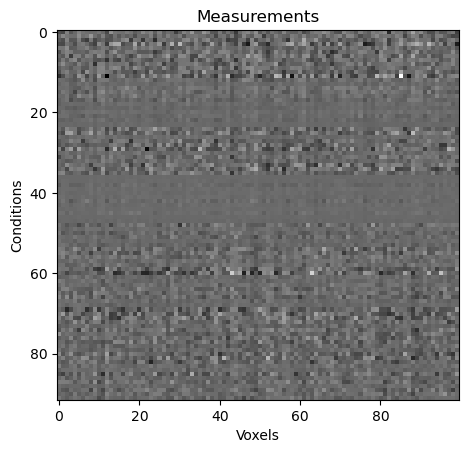

In [2]:
# import the measurements for the dataset
measurements = io.matlab.loadmat('rsatoolbox_demos/92imageData/simTruePatterns.mat')
measurements = measurements['simTruePatterns']
nCond = measurements.shape[0]
nVox = measurements.shape[1]

# plot the imported data
plt.imshow(measurements,cmap='gray') 
plt.xlabel('Voxels')
plt.ylabel('Conditions')
plt.title('Measurements')

## Creating the dataset object

We will now arrange the loaded data into a dataset object for use in rsatoolbox.

A dataset object contains all the information needed to calculate a representational dissimilarity matrix (RDM). Therefore, the dataest must include:
 - measurements: [NxP] numpy.ndarray. These are the observations (N) from each measurement channel (P).
 - obs_descriptors: dict that defines the condition label associated with each observation in measurements

Because we also want to include helpful information about this dataset, we include the additional information:
 - descriptors: dict with metadata about this dataset object (e.g. experiment session #, subject #, experiment name). Basically general descriptions
 - channel_descriptors: dict that identifies each column (channel) in measurements

To start, we will note the session # (e.g. the first scanning session) and the subject # for this dataset. In addition, we will create labels for each of the 92 conditions and 100 voxels. Finally, we package this information into an rsatoolbox dataset object.

In [3]:
# now create a  dataset object
des = {'session': 1, 'subj': 1}
obs_des = {'conds': np.array(['cond_' + str(x) for x in np.arange(nCond)])}
chn_des = {'voxels': np.array(['voxel_' + str(x) for x in np.arange(nVox)])}
#obs_des = {'conds': np.array(['cond_' + str(x) for x in np.arange(1,nCond+1)])} # indices from 1
#chn_des = {'conds': np.array(['voxel' + str(x) for x in np.arange(1,nVox+1)])} # indices from 1
data = rsd.Dataset(measurements=measurements,
                           descriptors=des,
                           obs_descriptors=obs_des,
                           channel_descriptors=chn_des)
print(data)

rsatoolbox.data.Dataset
measurements = 
[[-2.28467120e+16 -2.89393925e+16  1.98175667e+16 -1.52670137e+16
   6.16739860e+14  2.10873889e+16  7.54719220e+15  3.91406464e+15
   2.06459753e+15  1.71183930e+15  9.25183442e+15  6.25203471e+14
  -2.61395909e+16  3.30336292e+16  9.85160565e+15  7.08693907e+15
   4.56990621e+15  1.43744616e+16  7.94155302e+15 -9.69347003e+15
   4.54740006e+13  2.52235447e+16  1.09579543e+16  2.01266145e+16
  -8.27816988e+15  1.78844114e+16 -8.56003159e+15  3.99141304e+15
   6.61310188e+14 -3.44699674e+16 -1.02998653e+16  2.17767629e+16
   8.36071759e+15  3.87267836e+16 -7.68930294e+13  2.92524184e+14
   3.61891025e+16  2.03835675e+16 -1.48229413e+16 -1.79885027e+16
   1.38548750e+16 -1.48847681e+16  8.07503594e+15 -6.08550537e+15
  -3.95331143e+16  1.47461837e+15  1.82758194e+16  2.49558214e+16
   5.57712653e+15  3.05545911e+16 -1.34602130e+16  6.08982232e+15
  -1.46623702e+16  9.11955876e+15 -1.48137929e+15 -1.00568477e+16
   2.26715542e+16 -2.28012042e+15 -8

Sometimes we wish to consider only a subset of data - either a subset of observations (conditions), or subset of measurement channels.  This might be to only consider the measurement channels where all the subjects have data, or conditions which occur across all subjects / sessions. Using dataset functionality, we can subset the datasets according to a subset of the conditions or channels via 'subset_obs' and 'subset_channel', respectively.

In [4]:
# create an example dataset with random data, subset some conditions
nChannel = 50
nObs = 12
randomData = np.random.rand(nObs, nChannel)
des = {'session': 1, 'subj': 1}
obs_des = {'conds': np.array([0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5])}
chn_des = {'voxels': np.array(['voxel_' + str(x) for x in np.arange(nChannel)])}
data = rsd.Dataset(measurements=randomData,
                        descriptors=des,
                        obs_descriptors=obs_des,
                        channel_descriptors=chn_des
                        )
# select a subset of the dataset: select data only from conditions 0:4
sub_data = data.subset_obs(by='conds', value=[0,1,2,3,4])
print(sub_data)

rsatoolbox.data.Dataset
measurements = 
[[0.69123262 0.92104712 0.61818312 0.20524974 0.64105296 0.50985228
  0.97685374 0.7212065  0.35676375 0.84273013 0.3609348  0.80300151
  0.25083962 0.63109522 0.99815721 0.97127848 0.85833384 0.74920698
  0.04968341 0.7813052  0.66859366 0.38132352 0.90592036 0.42050118
  0.41052007 0.55036052 0.38791861 0.15385515 0.86476818 0.58082559
  0.91523005 0.14502139 0.19282622 0.22881753 0.11548584 0.6197761
  0.39736111 0.56396728 0.98489363 0.83174017 0.12852484 0.36546498
  0.41746084 0.81323561 0.28851042 0.36366229 0.94666631 0.28897269
  0.32294223 0.58757798]
 [0.66825301 0.64701594 0.54594818 0.06821566 0.04628114 0.97333844
  0.56765237 0.58083762 0.10132326 0.97895566 0.09538387 0.29373005
  0.98737576 0.74832983 0.11042381 0.22431568 0.8035064  0.50289686
  0.63254391 0.96844223 0.38797538 0.38352535 0.52784678 0.66257018
  0.67146816 0.45248375 0.20934405 0.39620568 0.73230381 0.92818005
  0.35985127 0.87003483 0.56246858 0.48403176 0.2028

Additionally, you might want to split the data in a certain way and analyze the splits as separate datasets. For instance, if your data is organized such that there are different ROIs, you might wish to perform the subsequent analyses separately for each ROI. Similarly, you could split the observations. This is supported with 'split_obs' and 'split_channel' options on the dataset object.

In [5]:
# Split by channels
nChannel = 3 
nChannelVox = 10 # three ROIs, each with 10 voxels
nObs = 4
randomData = np.random.rand(nObs, nChannel*nChannelVox)
des = {'session': 1, 'subj': 1}
obs_des = {'conds': np.array([0, 1, 2, 3])}
chn_des = ['ROI1', 'ROI2', 'ROI3'] * nChannelVox
chn_des = {'ROIs': np.array(chn_des)}
data = rsd.Dataset(measurements=randomData,
                        descriptors=des,
                        obs_descriptors=obs_des,
                        channel_descriptors=chn_des
                        )
split_data = data.split_channel(by='ROIs')
print(split_data)

[rsatoolbox.data.Dataset(
measurements = 
[[0.3915012  0.83538228 0.29414229 0.71575214 0.61938507 0.83389806
  0.96908148 0.3737883  0.17461245 0.85580307]
 [0.10041112 0.49427605 0.82223773 0.40374064 0.91827442 0.84807578
  0.95566655 0.11898774 0.53819388 0.86237862]
 [0.10682727 0.37575488 0.81180384 0.11734809 0.54336021 0.35363131
  0.71947132 0.80243679 0.75466692 0.48516029]
 [0.52602779 0.44823796 0.29178972 0.77585888 0.8985695  0.66477243
  0.74710454 0.43248481 0.91803052 0.0481015 ]]
descriptors = 
{'session': 1, 'subj': 1, 'ROIs': 'ROI1'}
obs_descriptors = 
{'conds': array([0, 1, 2, 3])}
channel_descriptors = 
{'ROIs': ['ROI1', 'ROI1', 'ROI1', 'ROI1', 'ROI1', 'ROI1', 'ROI1', 'ROI1', 'ROI1', 'ROI1']}
, rsatoolbox.data.Dataset(
measurements = 
[[0.99770095 0.48803115 0.38300648 0.53458173 0.68065003 0.14154644
  0.15133425 0.46605063 0.43268536 0.90289353]
 [0.18787884 0.06202607 0.53203572 0.41431661 0.5485064  0.81058469
  0.62956597 0.60350076 0.88428832 0.34072545]
 [0

## 2. Multi-subject dataset example

First, we generate random data for a number of subjects. For simplicity, here we set each subject to have the same number of voxels and conditions.

In [6]:
# create a datasets with random data
nVox = 50 # 50 voxels/electrodes/measurement channels
nCond = 10 # 10 conditions
nSubj = 5 # 5 different subjects
randomData = np.random.rand(nCond, nVox, nSubj)

We can then create a list of dataset objects by appending each dataset for each subject.

In [7]:
obs_des = {'conds': np.array(['cond_' + str(x) for x in np.arange(nCond)])}
chn_des = {'voxels': np.array(['voxel_' + str(x) for x in np.arange(nVox)])}

data = [] # list of dataset objects
for i in np.arange(nSubj):
    des = {'session': 1, 'subj': i+1}
    # append the dataset object to the data list
    data.append(rsd.Dataset(measurements=randomData[:,:,i],
                        descriptors=des,
                        obs_descriptors=obs_des,
                        channel_descriptors=chn_des
                        )
               )

In [8]:
print(len(data))

5
